In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('cars.csv')

# About this file

Add Suggestion
Dataset contains these rows:
Car_ID: A unique identifier for each car listing.
Brand: The brand or manufacturer of the car (e.g., Toyota, Honda, Ford, etc.).
Model: The model of the car (e.g., Camry, Civic, Mustang, etc.).
Year: The manufacturing year of the car.
Kilometers_Driven: The total kilometers driven by the car.
Fuel_Type: The type of fuel used by the car (e.g., Petrol, Diesel, Electric, etc.).
Transmission: The transmission type of the car (e.g., Manual, Automatic).
Owner_Type: The number of previous owners of the car (e.g., First, Second, Third).
Mileage: The fuel efficiency of the car in kilometers per liter.
Engine: The engine capacity of the car in CC (Cubic Centimeters).
Power: The maximum power output of the car in bhp (Brake Horsepower).
Seats: The number of seats available in the car.
Price: The selling price of the car in INR (Indian Rupees), which is the target variable to predict.

# EDA

In [3]:
df.head()

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,1,Toyota,Corolla,2018,50000,Petrol,Manual,First,15,1498,108,5,800000
1,2,Honda,Civic,2019,40000,Petrol,Automatic,Second,17,1597,140,5,1000000
2,3,Ford,Mustang,2017,20000,Petrol,Automatic,First,10,4951,395,4,2500000
3,4,Maruti,Swift,2020,30000,Diesel,Manual,Third,23,1248,74,5,600000
4,5,Hyundai,Sonata,2016,60000,Diesel,Automatic,Second,18,1999,194,5,850000


In [4]:
df.info() # cambiar dos dtypes a alguno equivocado para que sepan que se cambiar dtype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Car_ID             100 non-null    int64 
 1   Brand              100 non-null    object
 2   Model              100 non-null    object
 3   Year               100 non-null    int64 
 4   Kilometers_Driven  100 non-null    int64 
 5   Fuel_Type          100 non-null    object
 6   Transmission       100 non-null    object
 7   Owner_Type         100 non-null    object
 8   Mileage            100 non-null    int64 
 9   Engine             100 non-null    int64 
 10  Power              100 non-null    int64 
 11  Seats              100 non-null    int64 
 12  Price              100 non-null    int64 
dtypes: int64(8), object(5)
memory usage: 10.3+ KB


In [5]:
df.describe()

,Car_ID,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
count,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,1.000000e+02
mean,50.500000,2018.39000,28150.000000,17.210000,1855.230000,158.130000,5.230000,1.574000e+06
std,29.011492,1.17116,9121.375716,3.309902,631.311475,76.968137,0.750151,1.000265e+06
min,1.000000,2016.00000,10000.000000,10.000000,999.000000,68.000000,4.000000,4.500000e+05
25%,25.750000,2017.75000,22000.000000,15.000000,1462.000000,103.000000,5.000000,7.000000e+05
50%,50.500000,2018.00000,27000.000000,17.000000,1774.000000,148.000000,5.000000,1.300000e+06
75%,75.250000,2019.00000,32000.000000,19.000000,2143.000000,187.000000,5.000000,2.500000e+06
max,100.000000,2021.00000,60000.000000,25.000000,4951.000000,396.000000,7.000000,4.000000e+06


In [6]:
df.drop('Car_ID', axis=1, inplace=True)

In [7]:
df.columns

Index(['Brand', 'Model', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'Price'],
      dtype='object')

In [8]:
df.groupby('Brand')['Model'].unique()

Brand
Audi                                   [A4, Q3, A6, A3, Q7, A5]
BMW                  [X1, 5 Series, X3, 7 Series, X5, 3 Series]
Ford          [Mustang, Endeavour, Figo, Aspire, Ranger, Eco...
Honda                                 [Civic, City, WR-V, BR-V]
Hyundai          [Sonata, Creta, Verna, Elantra, Santro, Venue]
Mahindra                                [Scorpio, Thar, XUV300]
Maruti                         [Swift, Ertiga, Vitara, S-Cross]
Mercedes                      [C-Class, GLC, E-Class, GLE, GLA]
Tata             [Nexon, Harrier, Altroz, Safari, Tigor, Tiago]
Toyota        [Corolla, Innova, Fortuner, Yaris, Camry, Inno...
Volkswagen           [Polo, Tiguan, Passat, Ameo, T-Roc, Vento]
Name: Model, dtype: object

This dataset contains many 'Brands' and 'Model'. If we want to transform them into dummy variable, we will get too many binary features.
In order to make a model with high explanatory power, we will categorize the card brands and Models into 'Luxury', 'Mid-Range'and 'Economy', depending on our car market knowledge and with help of AI.
Then, after creating our category map, we will drop 'Brand' and ' Model' Features, as we won't use them.

In [9]:
brand_category_map = {
    'Audi': 'Luxury',
    'BMW': 'Luxury',
    'Mercedes': 'Luxury',
    'Toyota': 'Mid-Range',
    'Honda': 'Mid-Range',
    'Ford': 'Mid-Range',
    'Volkswagen': 'Mid-Range',
    'Hyundai': 'Economy',
    'Maruti': 'Economy',
    'Tata': 'Economy',
    'Mahindra': 'Economy'
}

In [10]:
df['Brand_Category'] = df['Brand'].map(brand_category_map)

In [11]:
df.drop(['Brand', 'Model'], axis=1, inplace=True)

We are in a good position to transform our categorical variables into encoded dummy variables, known as one-hot encoding.

In [12]:
df = pd.get_dummies(df, dtype=int, drop_first=True)

In [13]:
df.info() #We have all int values 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Year                      100 non-null    int64
 1   Kilometers_Driven         100 non-null    int64
 2   Mileage                   100 non-null    int64
 3   Engine                    100 non-null    int64
 4   Power                     100 non-null    int64
 5   Seats                     100 non-null    int64
 6   Price                     100 non-null    int64
 7   Fuel_Type_Petrol          100 non-null    int32
 8   Transmission_Manual       100 non-null    int32
 9   Owner_Type_Second         100 non-null    int32
 10  Owner_Type_Third          100 non-null    int32
 11  Brand_Category_Luxury     100 non-null    int32
 12  Brand_Category_Mid-Range  100 non-null    int32
dtypes: int32(6), int64(7)
memory usage: 7.9 KB


In [14]:
df.head()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Second,Owner_Type_Third,Brand_Category_Luxury,Brand_Category_Mid-Range
0,2018,50000,15,1498,108,5,800000,1,1,0,0,0,1
1,2019,40000,17,1597,140,5,1000000,1,0,1,0,0,1
2,2017,20000,10,4951,395,4,2500000,1,0,0,0,0,1
3,2020,30000,23,1248,74,5,600000,0,1,0,1,0,0
4,2016,60000,18,1999,194,5,850000,0,0,1,0,0,0


Performing graphs to understand the relationship between features and label

<Axes: >

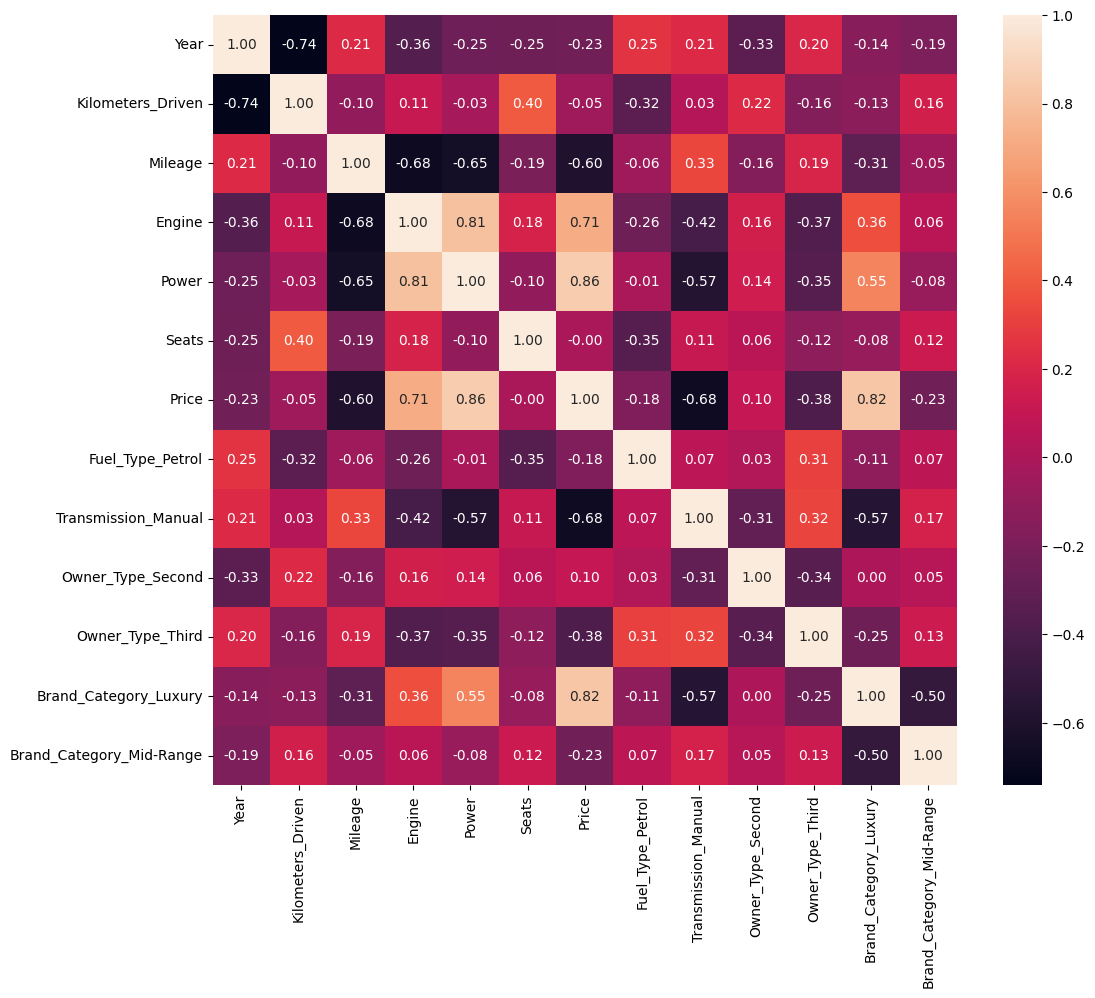

In [15]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, fmt=".2f", annot_kws={"size": 10})

<Axes: xlabel='Engine', ylabel='Power'>

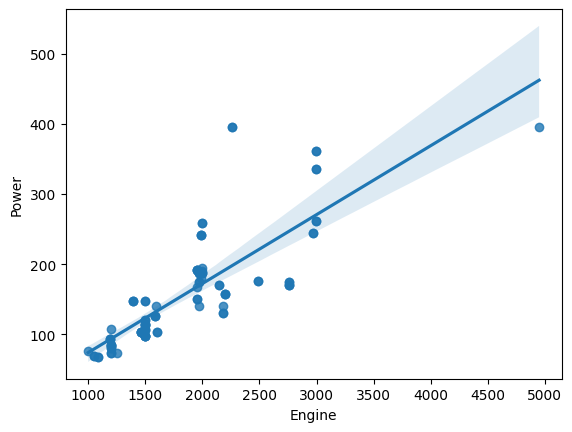

In [16]:
sns.regplot(df, x='Engine',y='Power')

<Axes: xlabel='Power', ylabel='Price'>

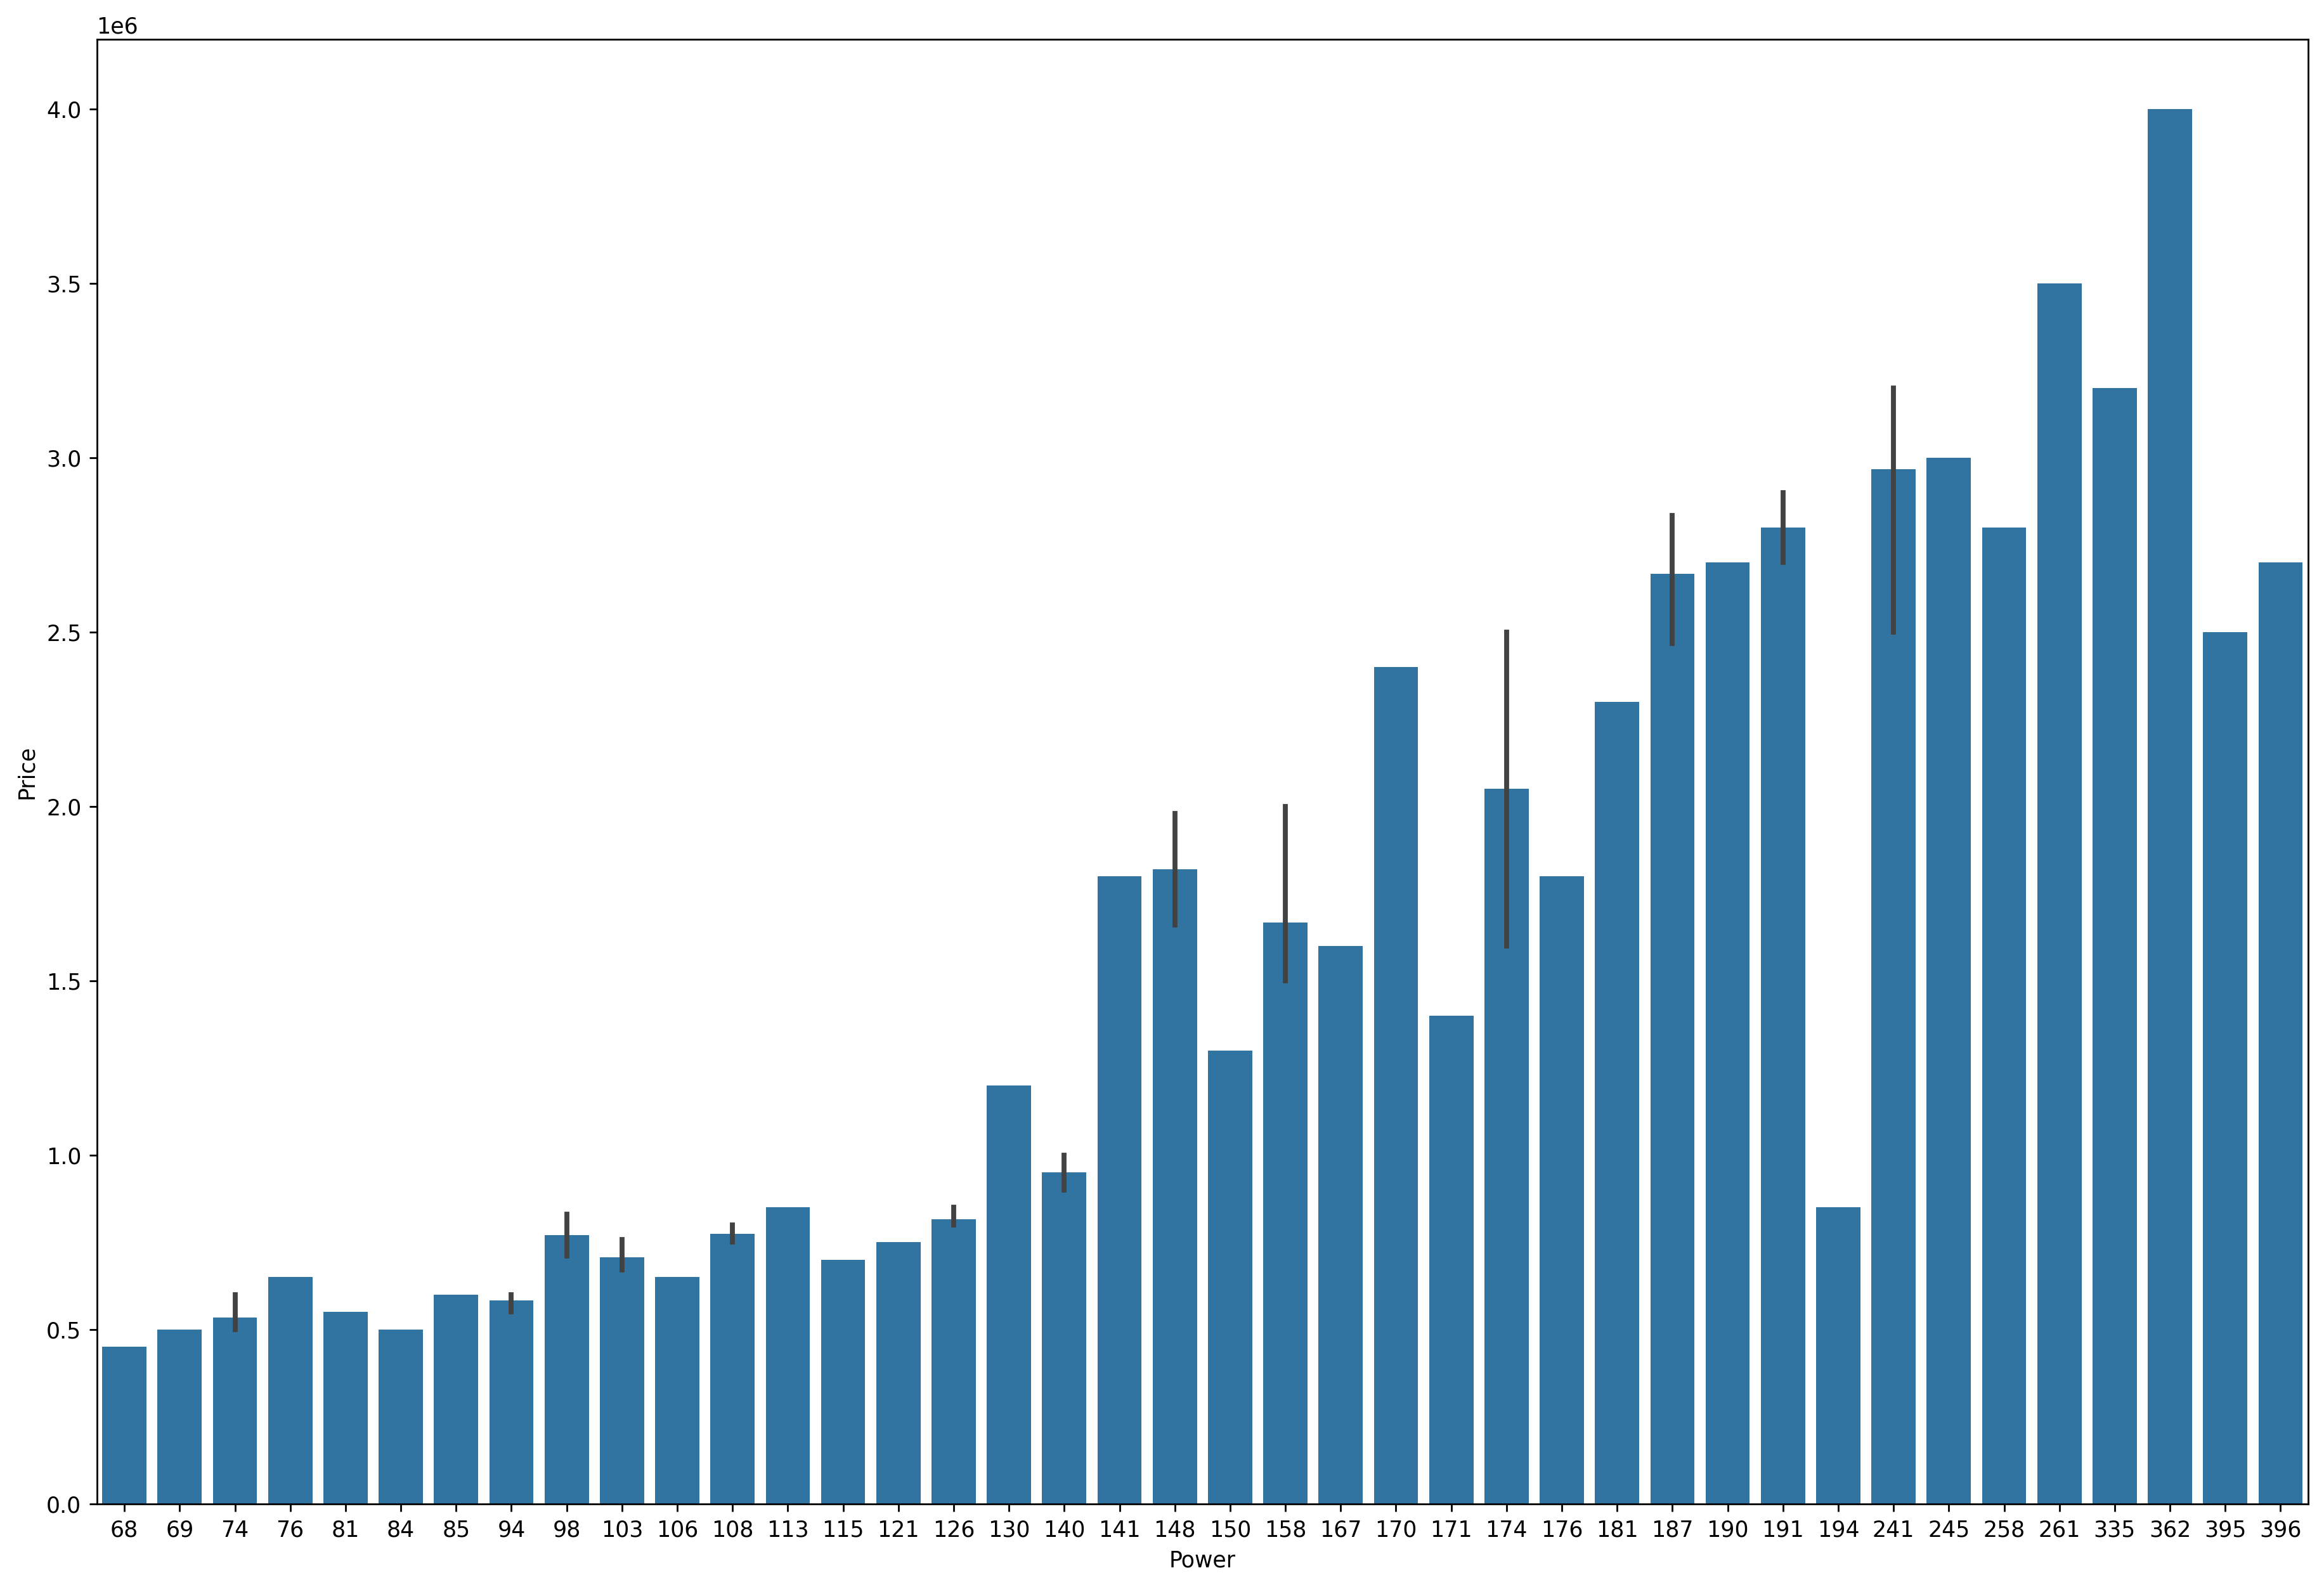

In [17]:
plt.figure(figsize=(18, 12), dpi=250)
sns.barplot(df, x = 'Power', y ='Price')

<Axes: xlabel='Power', ylabel='Price'>

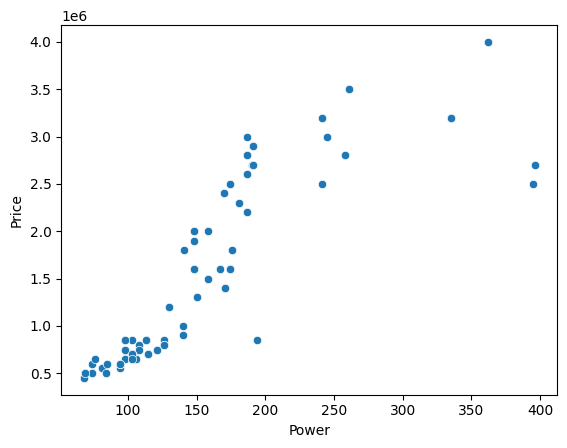

In [18]:
sns.scatterplot(df, x = 'Power', y ='Price')

We detect a couple of possible outliers that may affect our results.

Also, we can check from heatmap, that 'Engine' and 'Power' have a strong correlation of 0.81, which is very high. In this regard, considering that engine and Power mean almost the same in the car market as both stands mainly for power,  for practical purposes we will drop one of these features, as they can lead multicollinearity which can conduct to poor results.

In [19]:
df.drop('Engine', axis=1, inplace=True)

We detect one datapoint that is the most noticiable candidate as an outlier. Let's find it out.

In [20]:
df[(df['Power'] > 170) & (df['Price'] < 1000000)] 

,Year,Kilometers_Driven,Mileage,Power,Seats,Price,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Second,Owner_Type_Third,Brand_Category_Luxury,Brand_Category_Mid-Range
4,2016,60000,18,194,5,850000,0,0,1,0,0,0


As we can see, the potential outlier car belongs to the category 'Brand_Category_Economy'
Still there is a chance that this is or will be a usual behavior among cars, as it make sense, as soon as we realize that is the only car with almost 200hp that belongs to the Economy category.
Therefore, makes sense that it is listed in a lower price category compared to the other cards with the same or similar 'Power'
Anyway, we are not sure, because our dataset is quite small.
We will perform our ML analysis without removing this datapoint and then removing it and compare the performances.
Both solutions might be OK as long as we consider that our dataset is too small to represent the real world.

# Features and Label

In [21]:
X = df.drop('Price',axis=1)

In [22]:
y = df['Price']

# Train/Test Split 

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# Scaling the Data 

##### As features have different scales, we will homogeinize them in order to have same units

In [25]:
from sklearn.preprocessing import StandardScaler

In [26]:
scaler = StandardScaler()

In [27]:
Scaled_X_train = scaler.fit_transform(X_train)

In [28]:
Scaled_X_test = scaler.transform(X_test)

# Trying different Models

In [29]:
from sklearn.linear_model import LinearRegression

In [30]:
lr = LinearRegression()

In [31]:
lr.fit(Scaled_X_train, y_train)

LinearRegression()

In [32]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(Scaled_X_train, y_train)

RandomForestRegressor()

In [33]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()
gbr.fit(Scaled_X_train, y_train)

GradientBoostingRegressor()

In [34]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(Scaled_X_train, y_train)

SVR()

In [35]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
knn.fit(Scaled_X_train, y_train)

KNeighborsRegressor()

# Model Performance 

In [36]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [37]:
def performance(model):
    preds = model.predict(Scaled_X_test)
    print('Mean Root Squared Error:', np.sqrt(mean_squared_error(y_test, preds)))
    print('Mean Absolute Error:', mean_absolute_error(y_test, preds))

In [38]:
# Performance of Linear Regression (lr)
print("_________________________________")
print("Performance of Linear Regression:")
performance(lr)
print("_________________________________")
# Performance of Random Forest Regression (rfr)
print("Performance of Random Forest Regression:")
performance(rfr)
print("_________________________________")
# Performance of Gradient Boosting Regression (gbr)
print("Performance of Gradient Boosting Regression:")
performance(gbr)
print("_________________________________")
# Performance of Support Vector Regression (svr)
print("Performance of Support Vector Regression:")
performance(svr)
print("_________________________________")
# Performance of K-Nearest Neighbors Regression (knn)
print("Performance of K-Nearest Neighbors Regression:")
performance(knn)
print("_________________________________")

_________________________________
Performance of Linear Regression:
Mean Root Squared Error: 266432.7364999272
Mean Absolute Error: 219727.74632559
_________________________________
Performance of Random Forest Regression:
Mean Root Squared Error: 238152.104756603
Mean Absolute Error: 137583.33333333334
_________________________________
Performance of Gradient Boosting Regression:
Mean Root Squared Error: 168952.0668606178
Mean Absolute Error: 68016.77703565029
_________________________________
Performance of Support Vector Regression:
Mean Root Squared Error: 933581.5080720576
Mean Absolute Error: 778328.961785112
_________________________________
Performance of K-Nearest Neighbors Regression:
Mean Root Squared Error: 423599.6537612686
Mean Absolute Error: 309666.6666666667
_________________________________


Performance of Gradient Boosting Regression is the best.
Let's tune its hyperparameters

# Tuning Hyperparameters on Gradient Boosting Model with GridSearchCV

In [39]:
from sklearn.model_selection import GridSearchCV

In [40]:
param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

In [41]:
grid_search_gbr = GridSearchCV(gbr, param_grid, cv=5, scoring='neg_mean_absolute_error')
grid_search_gbr.fit(Scaled_X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [50, 100, 150, 200]},
             scoring='neg_mean_absolute_error')

In [42]:
print("Best Parameters for Gradient Boosting Regression:")
print(grid_search_gbr.best_params_)

Best Parameters for Gradient Boosting Regression:
{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}


# Comparing Performance between GridSearchCV + GBR and GBR (alone)

In [43]:
# Performance of GridSearchCV + GBR(lr)
print("_________________________________")
print("Performance of GridSearchCV + GBR:")
performance(grid_search_gbr)

_________________________________
Performance of GridSearchCV + GBR:
Mean Root Squared Error: 170297.85782455927
Mean Absolute Error: 61014.919446261585


In [44]:
# Performance of Gradient Boosting Regression (gbr)
print("Performance of GBR:")
performance(gbr)

Performance of GBR:
Mean Root Squared Error: 168952.0668606178
Mean Absolute Error: 68016.77703565029


We managed to perform better with gbr + GridSearchCV: Considerable lower MAE and MRSE almost unvariable.

# From now onwards, we will remove the potential Outlier discussed at the end of EDA. We will repeat same code afterwards

In [45]:
df = pd.read_csv('cars.csv')

In [46]:
df.drop('Car_ID', axis=1, inplace=True)

In [47]:
brand_category_map = {
    'Audi': 'Luxury',
    'BMW': 'Luxury',
    'Mercedes': 'Luxury',
    'Toyota': 'Mid-Range',
    'Honda': 'Mid-Range',
    'Ford': 'Mid-Range',
    'Volkswagen': 'Mid-Range',
    'Hyundai': 'Economy',
    'Maruti': 'Economy',
    'Tata': 'Economy',
    'Mahindra': 'Economy'
}

In [48]:
df['Brand_Category'] = df['Brand'].map(brand_category_map)
df.drop(['Brand', 'Model'], axis=1, inplace=True)

In [49]:
df = pd.get_dummies(df, dtype=int, drop_first=True)

In [50]:
df[(df['Power'] > 170) & (df['Price'] < 1000000)] 

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Second,Owner_Type_Third,Brand_Category_Luxury,Brand_Category_Mid-Range
4,2016,60000,18,1999,194,5,850000,0,0,1,0,0,0


In [51]:
df.drop(df[(df['Power'] > 170) & (df['Price'] < 1000000)].index, axis=0, inplace=True)

<Axes: xlabel='Power', ylabel='Price'>

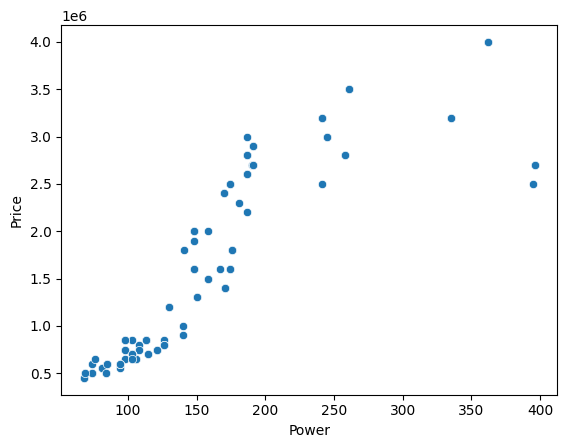

In [52]:
sns.scatterplot(df, x = 'Power', y ='Price')

In [53]:
#Features and Label
X = df.drop('Price',axis=1)
y = df['Price']
#Train/Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
#Scaling the Data
#As features have different scales, we will homogeinize them in order to have same units
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Scaled_X_train = scaler.fit_transform(X_train)
Scaled_X_test = scaler.transform(X_test)

#Trying on different Models
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(Scaled_X_train, y_train)

#LinearRegression
LinearRegression()
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(Scaled_X_train, y_train)

#RandomForestRegressor
RandomForestRegressor()
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()
gbr.fit(Scaled_X_train, y_train)

#GradientBoostingRegressor
GradientBoostingRegressor()
from sklearn.svm import SVR
svr = SVR()
svr.fit(Scaled_X_train, y_train)

#SVR
SVR()
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
knn.fit(Scaled_X_train, y_train)

#KNeighborsRegressor
KNeighborsRegressor()

#Model Performance
from sklearn.metrics import mean_squared_error, mean_absolute_error
def performance(model):
    preds = model.predict(Scaled_X_test)
    print('Mean Root Squared Error:', np.sqrt(mean_squared_error(y_test, preds)))
    print('Mean Absolute Error:', mean_absolute_error(y_test, preds))
# Performance of Linear Regression (lr)
print("_________________________________")
print("Performance of Linear Regression:")
performance(lr)
print("_________________________________")
# Performance of Random Forest Regression (rfr)
print("Performance of Random Forest Regression:")
performance(rfr)
print("_________________________________")
# Performance of Gradient Boosting Regression (gbr)
print("Performance of Gradient Boosting Regression:")
performance(gbr)
print("_________________________________")
# Performance of Support Vector Regression (svr)
print("Performance of Support Vector Regression:")
performance(svr)
print("_________________________________")
# Performance of K-Nearest Neighbors Regression (knn)
print("Performance of K-Nearest Neighbors Regression:")
performance(knn)
print("_________________________________")

#Performance of Gradient Boosting Regression seems to be the best Let's tune their hyperparameters

#Tunning Parameters on Gradient Boosting Model with GridSearchCV
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'max_depth': [3, 5, 7]
}
grid_search_gbr = GridSearchCV(gbr, param_grid, cv=5, scoring='neg_mean_absolute_error')
grid_search_gbr.fit(Scaled_X_train, y_train)
GridSearchCV
estimator: GradientBoostingRegressor

#GradientBoostingRegressor
print("Best Parameters for Gradient Boosting Regression:")
print(grid_search_gbr.best_params_)
#Best Parameters for Gradient Boosting Regression:
{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
# Performance of GridSearchCV + gbr(lr)
print("_________________________________")
print("Performance of GridSearchCV + gbr:")
performance(grid_search_gbr)

# Performance of Gradient Boosting Regression (gbr)
print("Performance of Gradient Boosting Regression:")
performance(gbr)
#We managed to perform better with MAE, but we keep MRSE almost unvariable

_________________________________
Performance of Linear Regression:
Mean Root Squared Error: 285810.95928568306
Mean Absolute Error: 215631.46812010073
_________________________________
Performance of Random Forest Regression:
Mean Root Squared Error: 286134.8749570151
Mean Absolute Error: 164333.33333333334
_________________________________
Performance of Gradient Boosting Regression:
Mean Root Squared Error: 152598.02849141072
Mean Absolute Error: 81712.80842058161
_________________________________
Performance of Support Vector Regression:
Mean Root Squared Error: 1001909.6882044091
Mean Absolute Error: 896661.62496393
_________________________________
Performance of K-Nearest Neighbors Regression:
Mean Root Squared Error: 310413.7024466972
Mean Absolute Error: 227000.0
_________________________________
Best Parameters for Gradient Boosting Regression:
{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 50}
_________________________________
Performance of GridSearchCV + gbr:
Mean 

If we drop the potential outlier, we perform worse, therefore we will keep the model considering all datapoints (without removing the potential outlier)

# Performing the model considering all features but 'Car_ID'

In [54]:
df = pd.read_csv('cars.csv')
df.drop('Car_ID', axis=1, inplace=True)

In [55]:
df = pd.get_dummies(df, dtype=int, drop_first=True)

In [56]:
X = df.drop('Price',axis=1)
y = df['Price']
#Train/Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
#Scaling the Data
#As features have different scales, we will homogeinize them in order to have same units
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Scaled_X_train = scaler.fit_transform(X_train)
Scaled_X_test = scaler.transform(X_test)
#Trying on different Models

#LinearRegression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(Scaled_X_train, y_train)

#RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(Scaled_X_train, y_train)

#GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()
gbr.fit(Scaled_X_train, y_train)

#SVR
from sklearn.svm import SVR
svr = SVR()
svr.fit(Scaled_X_train, y_train)

#KNeighborsRegressor
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
knn.fit(Scaled_X_train, y_train)

#LightGBM
!pip install lightgbm
import lightgbm as lgb
lgbm= lgb.LGBMRegressor()
lgbm.fit(Scaled_X_train, y_train)

#Model Performance
from sklearn.metrics import mean_squared_error, mean_absolute_error

def performance(model):
    preds = model.predict(Scaled_X_test)
    print('Mean Root Squared Error:', np.sqrt(mean_squared_error(y_test, preds)))
    print('Mean Absolute Error:', mean_absolute_error(y_test, preds))
    
# Performance of Linear Regression (lr)
print("_________________________________")
print("Performance of Linear Regression:")
performance(lr)
print("_________________________________")
# Performance of Random Forest Regression (rfr)
print("Performance of Random Forest Regression:")
performance(rfr)
print("_________________________________")
# Performance of Gradient Boosting Regression (gbr)
print("Performance of Gradient Boosting Regression:")
performance(gbr)
print("_________________________________")
# Performance of Support Vector Regression (svr)
print("Performance of Support Vector Regression:")
performance(svr)
print("_________________________________")
# Performance of K-Nearest Neighbors Regression (knn)
print("Performance of K-Nearest Neighbors Regression:")
performance(knn)
print("_________________________________")
# Performance of LightGBM
print("Performance of LightGBM:")
performance(lgbm)

#Performance of Gradient Boosting Regression seems to be the best Let's tune their hyperparameters

#Tunning Parameters on Gradient Boosting Model with GridSearchCV
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'max_depth': [3, 5, 7]
}
grid_search_gbr = GridSearchCV(gbr, param_grid, cv=5, scoring='neg_mean_absolute_error')
grid_search_gbr.fit(Scaled_X_train, y_train)
GridSearchCV
estimator: GradientBoostingRegressor

#GradientBoostingRegressor
print("Best Parameters for Gradient Boosting Regression:")
print(grid_search_gbr.best_params_)
#Best Parameters for Gradient Boosting Regression:
{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
# Performance of GridSearchCV + gbr(lr)
print("_________________________________")
print("Performance of GridSearchCV + gbr:")
performance(grid_search_gbr)

# Performance of Gradient Boosting Regression (gbr)
print("Performance of Gradient Boosting Regression:")
performance(gbr)
#We managed to perform better with MAE, but we keep MRSE almost unvariable

C:\Users\afrik\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:110: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\afrik\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 217, in _count_physical_cores
    raise ValueError(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000730 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 80
[LightGBM] [Info] Number of data points in the train set: 70, number of used features: 8
[LightGBM] [Info] Start training from score 1623571.428571
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

Mean Root Squared Error: 774788.1430860094
Mean Absolute Error: 688333.3333333334
_________________________________
Performance of LightGBM:
Mean Root Squared Error: 299395.87736018724
Mean Absolute Error: 206051.98056517766
Best Parameters for Gradient Boosting Regression:
{'learning_rate': 0.3, 'max_depth': 3, 'n_estimators': 50}
_________________________________
Performance of GridSearchCV + gbr:
Mean Root Squared Error: 236824.04642785236
Mean Absolute Error: 99864.18679988802
Performance of Gradient Boosting Regression:
Mean Root Squared Error: 241798.71198864642
Mean Absolute Error: 111294.16320511543


We perform worse with all the features, therefore, we will keep the model with the categories we made for the features 'Brand' and 'Model' and will remove only 'Engine' feature.

In [57]:
df = pd.read_csv('cars.csv')
df.drop('Car_ID', axis=1, inplace=True)
brand_category_map = {
    'Audi': 'Luxury',
    'BMW': 'Luxury',
    'Mercedes': 'Luxury',
    'Toyota': 'Mid-Range',
    'Honda': 'Mid-Range',
    'Ford': 'Mid-Range',
    'Volkswagen': 'Mid-Range',
    'Hyundai': 'Economy',
    'Maruti': 'Economy',
    'Tata': 'Economy',
    'Mahindra': 'Economy'
}
df['Brand_Category'] = df['Brand'].map(brand_category_map)
df.drop(['Brand', 'Model'], axis=1, inplace=True)
df.drop('Engine', axis=1, inplace=True)
df = pd.get_dummies(df, dtype=int, drop_first=True)

In [58]:
#Features and Label
X = df.drop('Price',axis=1)
y = df['Price']
#Train/Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
#Scaling the Data
#As features have different scales, we will homogeinize them in order to have same units
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Scaled_X_train = scaler.fit_transform(X_train)
Scaled_X_test = scaler.transform(X_test)
#Trying on different Models
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(Scaled_X_train, y_train)

#LinearRegression
LinearRegression()
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(Scaled_X_train, y_train)

#RandomForestRegressor
RandomForestRegressor()
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()
gbr.fit(Scaled_X_train, y_train)

#GradientBoostingRegressor
GradientBoostingRegressor()
from sklearn.svm import SVR
svr = SVR()
svr.fit(Scaled_X_train, y_train)

#SVR
SVR()
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
knn.fit(Scaled_X_train, y_train)

#KNeighborsRegressor
KNeighborsRegressor()

#LightGBM
!pip install lightgbm
import lightgbm as lgb
lgbm= lgb.LGBMRegressor()
lgbm.fit(Scaled_X_train, y_train)

#Model Performance
from sklearn.metrics import mean_squared_error, mean_absolute_error
def performance(model):
    preds = model.predict(Scaled_X_test)
    print('Mean Root Squared Error:', np.sqrt(mean_squared_error(y_test, preds)))
    print('Mean Absolute Error:', mean_absolute_error(y_test, preds))
# Performance of Linear Regression (lr)
print("_________________________________")
print("Performance of Linear Regression:")
performance(lr)
print("_________________________________")
# Performance of Random Forest Regression (rfr)
print("Performance of Random Forest Regression:")
performance(rfr)
print("_________________________________")
# Performance of Gradient Boosting Regression (gbr)
print("Performance of Gradient Boosting Regression:")
performance(gbr)
print("_________________________________")
# Performance of Support Vector Regression (svr)
print("Performance of Support Vector Regression:")
performance(svr)
print("_________________________________")
# Performance of K-Nearest Neighbors Regression (knn)
print("Performance of K-Nearest Neighbors Regression:")
performance(knn)
print("_________________________________")
# Performance of LightGBM
print("Performance of LightGBM:")
performance(lgbm)

#Performance of Gradient Boosting Regression seems to be the best Let's tune their hyperparameters

#Tunning Parameters on Gradient Boosting Model with GridSearchCV
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'max_depth': [3, 5, 7]
}
grid_search_gbr = GridSearchCV(gbr, param_grid, cv=5, scoring='neg_mean_absolute_error')
grid_search_gbr.fit(Scaled_X_train, y_train)
GridSearchCV
estimator: GradientBoostingRegressor

#GradientBoostingRegressor
print("Best Parameters for Gradient Boosting Regression:")
print(grid_search_gbr.best_params_)
#Best Parameters for Gradient Boosting Regression:
{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
# Performance of GridSearchCV + gbr(lr)
print("_________________________________")
print("Performance of GridSearchCV + gbr:")
performance(grid_search_gbr)

# Performance of Gradient Boosting Regression (gbr)
print("Performance of Gradient Boosting Regression:")
performance(gbr)
#We managed to perform better with MAE, but we keep MRSE almost unvariable

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000458 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 67
[LightGBM] [Info] Number of data points in the train set: 70, number of used features: 9
[LightGBM] [Info] Start training from score 1623571.428571
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

Best Parameters for Gradient Boosting Regression:
{'learning_rate': 0.3, 'max_depth': 3, 'n_estimators': 50}
_________________________________
Performance of GridSearchCV + gbr:
Mean Root Squared Error: 187631.10958136202
Mean Absolute Error: 66691.44552821868
Performance of Gradient Boosting Regression:
Mean Root Squared Error: 169584.13913399805
Mean Absolute Error: 68184.6140255426


We choose GridSearchCV + gbr model, as we priorize MAE over MRSE. 
Don't want to punish the outliers, in this case because our dataset is small and all data is relevant.

# Training on all data 

In [59]:
Scaled_X_ = scaler.fit_transform(X) #Scaling all feature data

In [60]:
gbr_final = GradientBoostingRegressor(learning_rate=0.1, max_depth= 3, n_estimators= 200)

In [61]:
gbr_final.fit(X,y)

GradientBoostingRegressor(n_estimators=200)

# Saving and Loading the Final Model

In [62]:
from joblib import load, dump

In [63]:
final_model = dump(gbr_final, 'gbr_final_model.job')

In [64]:
load('gbr_final_model.job')

GradientBoostingRegressor(n_estimators=200)

# Feature Importance - Final Model 

In [65]:
gbr_final.feature_names_in_

array(['Year', 'Kilometers_Driven', 'Mileage', 'Power', 'Seats',
       'Fuel_Type_Petrol', 'Transmission_Manual', 'Owner_Type_Second',
       'Owner_Type_Third', 'Brand_Category_Luxury',
       'Brand_Category_Mid-Range'], dtype=object)

In [66]:
gbr_final.feature_importances_

array([2.19380209e-02, 8.99903420e-02, 1.91745220e-02, 6.57510663e-01,
       1.60275650e-03, 2.01891837e-04, 4.01193751e-03, 1.19863960e-03,
       4.58899631e-06, 2.03915401e-01, 4.51236757e-04])

In [67]:
# Get the feature names
feature_names = gbr_final.feature_names_in_

# Get the feature importances
feature_importances = gbr_final.feature_importances_

# Combine feature names and importances into a DataFrame for better visualization
feature_importances_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# Sort the DataFrame by importance
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

# Display the DataFrame
print('Feature Importance')
print('------------------------------------------')
print(feature_importances_df)

Feature Importance
------------------------------------------
                     Feature  Importance
3                      Power    0.657511
9      Brand_Category_Luxury    0.203915
1          Kilometers_Driven    0.089990
0                       Year    0.021938
2                    Mileage    0.019175
6        Transmission_Manual    0.004012
4                      Seats    0.001603
7          Owner_Type_Second    0.001199
10  Brand_Category_Mid-Range    0.000451
5           Fuel_Type_Petrol    0.000202
8           Owner_Type_Third    0.000005


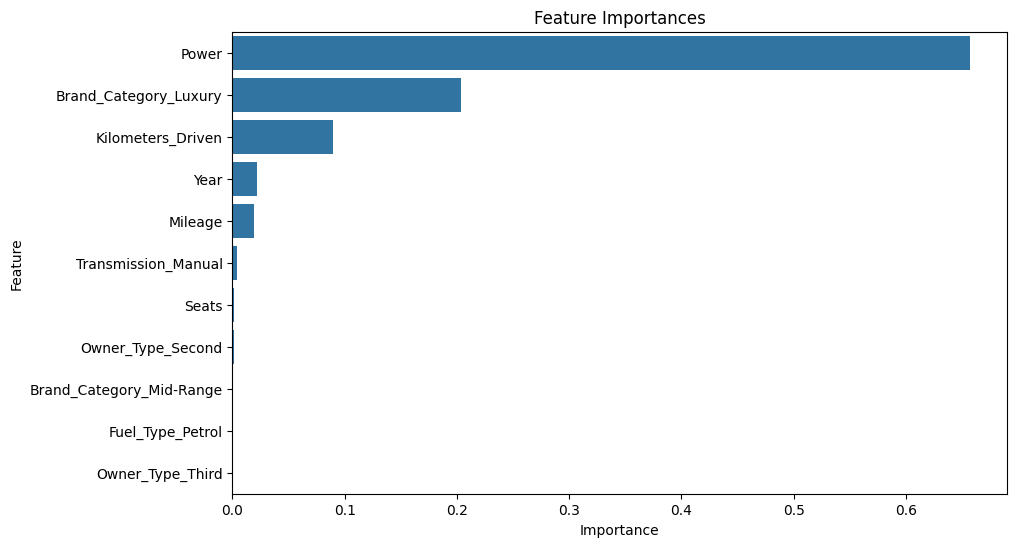

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importances_df, x='Importance', y='Feature')
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [69]:
feature_importances_df ['Importance'].sum() #In fact, all importances must sum "1"

1.0

According to our model, the three most important features in terms of explanatory power for used car prices are, in descendent order:

-'Power: 65.7%
-'Brand_Category_Luxury': 20.5%
-'Kilometers_Driven': 9.0%

This makes sense, as 'Power' feature represents a car's Horse Power (HP).
The more HP a car has, it is easily correlated with higher price in real life. In addition, Luxury cars tend to have more hp than economy cars; but in the same price range, economy cars tend to have more HP than luxury, as luxury cars offers more than a economy cars in other areas, like external materials, seat comfort, sound system, among others. Luxury cars has better reputation in general, therefore everything else constant, are priced higher than an Economy or Mid-Range car.